In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
print(df['sex'].value_counts(), '\n')

print(df['smoker'].value_counts(), '\n')

print(df['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64 

no     1064
yes     274
Name: smoker, dtype: int64 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
lab_enc = LabelEncoder()

In [7]:
df_2 = lab_enc.fit_transform(df['sex'])

df_3 = lab_enc.fit_transform(df['smoker'])

df_4 = lab_enc.fit_transform(df['region'])

In [8]:
df['sex'] = df_2

df['smoker'] = df_3

df['region'] = df_4

In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [10]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


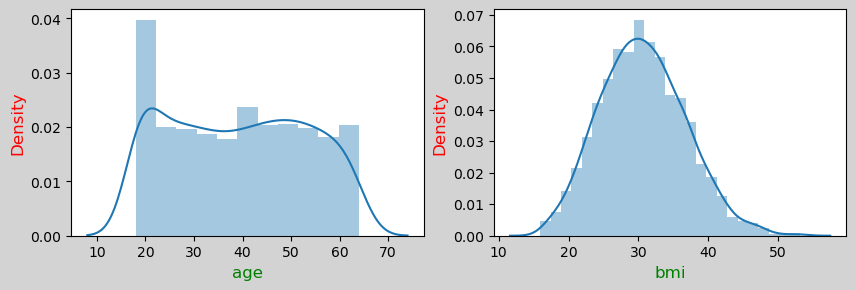

In [13]:
# checking for the skewness in age and bmi as these only appear to have higher std dev.

plt.figure(figsize=(10,10), facecolor='lightgrey')
graph_no = 1

for column in df[['age', 'bmi']]:
    if graph_no <= 6:
        ax = plt.subplot(3,2, graph_no)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=12, color='green')
        plt.ylabel('Density', fontsize=12, color='red')
        
    graph_no += 1
plt.show()

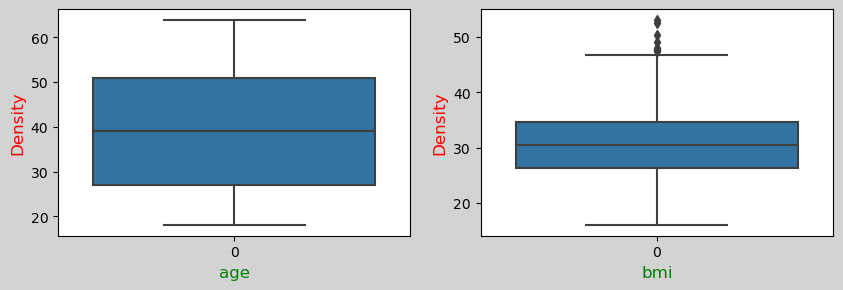

In [14]:
# checking for outliers using box-plot

plt.figure(figsize=(10,10), facecolor='lightgrey')
graph_no = 1

for column in df[['age', 'bmi']]:
    if graph_no <= 6:
        ax = plt.subplot(3,2, graph_no)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=12, color='green')
        plt.ylabel('Density', fontsize=12, color='red')
        
    graph_no += 1
plt.show()

In [15]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3 - q1

In [16]:
# removing the ouliers through Inter Quartile Range

bmi_high = (q3.bmi + (1.5 * iqr.bmi))
print(bmi_high)

index = np.where(df['bmi'] > bmi_high)
print(index)

df = df.drop(df.index[index])

print(df.shape)

df.reset_index()

47.290000000000006
(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)
(1329, 7)


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,3,16884.92400
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1324,1333,50,1,30.970,3,0,1,10600.54830
1325,1334,18,0,31.920,0,0,0,2205.98080
1326,1335,18,0,36.850,0,0,2,1629.83350
1327,1336,21,0,25.800,0,0,3,2007.94500


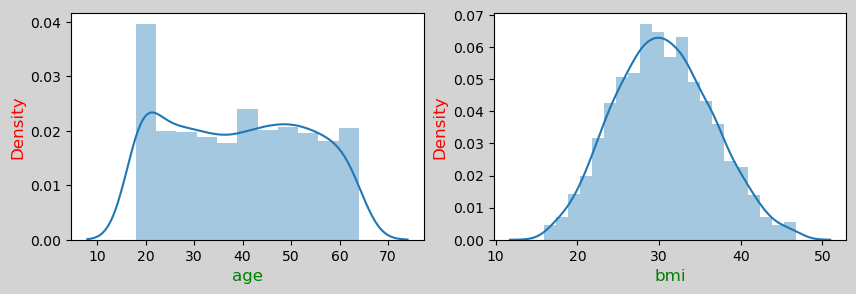

In [17]:
# rechecking if there is any skewness in the graphs

plt.figure(figsize=(10,10), facecolor='lightgrey')
graph_no = 1

for column in df[['age', 'bmi']]:
    if graph_no <= 6:
        ax = plt.subplot(3,2, graph_no)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=12, color='green')
        plt.ylabel('Density', fontsize=12, color='red')
        
    graph_no += 1
plt.show()

In [18]:
x = df.drop(columns=['charges'], axis = 1)
y = df['charges']

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.ensemble import AdaBoostRegressor

ab_reg = AdaBoostRegressor()
ab_reg.fit(x_train, y_train)

AdaBoostRegressor()

In [21]:
y_pred = ab_reg.predict(x_train)

In [22]:
y_pred

array([20176.16069563, 11476.98604132,  5224.32413748, 18927.37781123,
       26436.96596333,  5224.32413748, 11476.98604132, 24369.36248571,
       44406.30472584, 11476.98604132,  5224.32413748,  5224.32413748,
        5224.32413748, 44070.29313241, 11476.98604132,  9279.38722804,
        7629.44701326, 39683.21016382, 14838.38887534,  5224.32413748,
       39683.21016382, 18927.37781123, 20176.16069563, 14196.97151603,
       14196.97151603, 14838.38887534,  9279.38722804, 11476.98604132,
        7629.44701326,  5224.32413748,  5224.32413748,  9279.38722804,
       11476.98604132, 14838.38887534, 14838.38887534,  7629.44701326,
        5224.32413748, 20176.16069563,  9279.38722804,  5224.32413748,
        5224.32413748,  5224.32413748,  5224.32413748, 44406.30472584,
        5224.32413748,  5224.32413748, 20176.16069563, 12604.28711154,
       14838.38887534,  5224.32413748,  9279.38722804,  5224.32413748,
       12604.28711154, 18927.37781123,  9279.38722804,  7629.44701326,
      

In [24]:
from sklearn import metrics

In [25]:
# TRAINING RESULT

print('R2_Score                  : ', metrics.r2_score(y_train, y_pred), '\n')

print('Mean Squared Error        : ', metrics.mean_squared_error(y_train, y_pred), '\n')

print('Rooted Mean Squared Error : ', np.sqrt( metrics.mean_squared_error(y_train, y_pred)))

R2_Score                  :  0.8439316641611112 

Mean Squared Error        :  22733293.4555531 

Rooted Mean Squared Error :  4767.944363722494


In [26]:
y_test_pred = ab_reg.predict(x_test)

In [27]:
# TESTING RESULT

print('R2_Score                  : ', metrics.r2_score(y_test, y_test_pred), '\n')

print('Mean Squared Error        : ', metrics.mean_squared_error(y_test, y_test_pred), '\n') 

print('Rooted Mean Squared Error : ', np.sqrt( metrics.mean_squared_error(y_test, y_test_pred)))

R2_Score                  :  0.8338917652091974 

Mean Squared Error        :  22952519.820422232 

Rooted Mean Squared Error :  4790.878815042417


In [28]:
# HYPER-PARAMETER TUNING USING GRID SEARCH CV

In [29]:
from sklearn.model_selection import GridSearchCV

In [31]:
parameters = {'n_estimators' : [30, 40, 60, 70], 'learning_rate' : [0.8, 1.2, 1.5, 2]}

In [32]:
gs_cv = GridSearchCV(AdaBoostRegressor(), param_grid = parameters, cv = 5)

gs_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.8, 1.2, 1.5, 2],
                         'n_estimators': [30, 40, 60, 70]})

In [33]:
gs_cv.best_estimator_

AdaBoostRegressor(learning_rate=0.8, n_estimators=60)

In [55]:
ab_reg = AdaBoostRegressor(n_estimators = 40, learning_rate = 0.05)

ab_reg.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.05, n_estimators=40)

In [56]:
y_pred = ab_reg.predict(x_test)

In [57]:
# TESTING RESULT POST - TUNING 

print('R2_Score                  : ', metrics.r2_score(y_test, y_pred), '\n')

print('Mean Squared Error        : ', metrics.mean_squared_error(y_test, y_pred), '\n') 

print('Rooted Mean Squared Error : ', np.sqrt( metrics.mean_squared_error(y_test, y_pred)))

R2_Score                  :  0.8536912945532856 

Mean Squared Error        :  20216658.529273417 

Rooted Mean Squared Error :  4496.293865982673
